In [1]:
import pandas as pd

data = pd.read_csv('reddit_submissions_casual_conv.csv', error_bad_lines=False)
data_text = data.loc[:, ['text']]
data_text['index'] = data_text.index
documents = data_text

In [2]:
len(documents)

37337

In [3]:
documents[:5]

,text,index
0,So I just started rewatching the Disney classi...,0
1,Its 3 in the morning and I was on my phone and...,1
2,Yesterday my buddy had some problems with a mu...,2
3,"I just learned that in 1994, a large group (60...",3
4,Im so lonely it hurts. Im sick of fighting dep...,4


### Data Preprocessing

We will perform the following steps:
- __Tokenization:__ Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
- Words that have fewer than 3 characters are removed.
- All __stopwords__ are removed.
- Words are __lemmatized__ — words in third person are changed to first person and verbs in past and future tenses are changed into present.
- Words are __stemmed__ — words are reduced to their root form.

In [4]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tuja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Write a function to perform lemmatize and stem preprocessing steps on the data set.

In [5]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

### Select a document to preview after preprocessing.

In [6]:
stemmer = SnowballStemmer('english')
doc_sample = documents[documents['index'] == 100].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Howdy', 'folks.', 'So', 'I', 'think', "it's", 'interesting', '(in', 'an', 'Orwellian', 'sort', 'of', 'way)', 'how', 'online', 'advertisers', 'use', 'your', 'data', 'and', 'convert', 'it', 'into', 'targeted', 'adverts', 'on', 'your', 'websites', 'that', 'are', 'seemingly', 'tailored', 'to', 'people', 'like', 'you.', "It's", '*nuts*', 'that', 'the', 'govt', "doesn't", 'stamp', 'down', 'on', 'this', 'wholesale', 'George', 'Orwell', 'thought-insertion', 'thing.', 'I', 'also', 'think', "it's", 'humorous', 'how', 'sometime', 'it', 'gets', 'it', 'wildly', 'wrong.', 'Rarely,', 'but', 'commonly,', 'my', 'internet', 'will', 'advertise', 'quarry', 'locations', 'because', 'I', 'play', 'the', 'Dark', 'Souls', 'series', 'and', 'I', 'try', 'to', 'max', 'out', 'weapons', 'early', 'which', 'requires', 'finding', 'rocks.', 'I', 'think', "it's", 'funny', 'that', 'an', 'algorithm', 'saw', 'my', 'google', 'post', '"where', 'to', 'find', 'titanite', 'chunks"', 'and', 'was', 'like', '*"

In [7]:
processed_docs = documents['text'].map(preprocess)
processed_docs[:10]

0    [start, rewatch, disney, classic, kiddo, weird...
1    [morn, phone, corner, hallway, chalk, mind, pl...
2    [yesterday, buddi, problem, mutual, acquaint, ...
3    [learn, larg, group, children, attend, primari...
4    [lone, hurt, sick, fight, depress, anorexia, s...
5    [graduat, live, parent, sibl, haven, start, ea...
6    [okay, yesterday, couldn, school, thing, like,...
7    [want, life, normal, scientist, believ, mask, ...
8    [worri, say, experi, normal, rounder, pick, wa...
9    [finish, watch, frankenstein, think, pretti, o...
Name: text, dtype: object

###  Counting Words

Once strings have been tokenized (and lowercased!) it’s often useful to count several things.
- Vocabulary size
- Number of tokens
- Word frequencies
- Relative word frequencies

In [8]:
# Calculate Lexical Diversity

# Merging Multiple Series of lists of words into one
token_list = processed_docs.apply(pd.Series).stack().reset_index(drop=True)

vocab_size = len(set(token_list))
num_tokens = len(token_list)

# Total Lexical Diversity = Total number of words (Vocab Size) / Total number of tokens
lex_div = vocab_size / num_tokens
print("Vocabulary Size: {} \t\tNumber of Tokens: {} \nLexical Diversity: {}".format(vocab_size, num_tokens, lex_div))

Vocabulary Size: 40280 		Number of Tokens: 2718884 
Lexical Diversity: 0.01481490199655447


#### Word Frequencies

In [9]:
fd = nltk.FreqDist(token_list)

In [10]:
def plot_freqdist_freq(fd,
                       max_num=None,
                       cumulative=False,
                       title='Word Frequency plot',
                       linewidth=2):
    """
    As of NLTK version 3.2.1, FreqDist.plot() plots the counts
    and has no kwarg for normalising to frequency.
    Work this around here.

    INPUT:
        - the FreqDist object
        - max_num: if specified, only plot up to this number of items
          (they are already sorted descending by the FreqDist)
        - cumulative: bool (defaults to False)
        - title: the title to give the plot
        - linewidth: the width of line to use (defaults to 2)
    OUTPUT: plot the freq and return None.
    """

    tmp = fd.copy()
    norm = fd.N()
    for key in tmp.keys():
        tmp[key] = float(fd[key]) / norm

    if max_num:
        tmp.plot(max_num, cumulative=cumulative,
                 title=title, linewidth=linewidth)
    else:
        tmp.plot(cumulative=cumulative,
                 title=title,
                 linewidth=linewidth)

    return

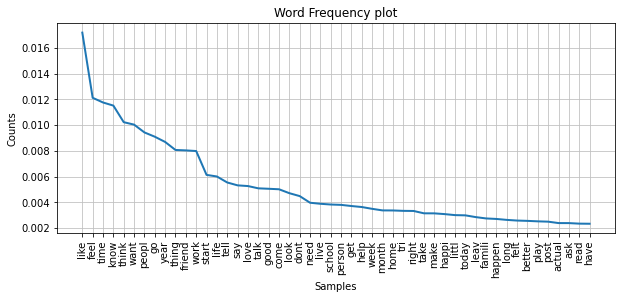

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,4))
plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
plot_freqdist_freq(fd,50)
fig.savefig('freqDist_50.png', bbox_inches = "tight")

## Topic Modeling

### Bag of Words on the dataset

Create a dictionary from 'processed_docs' containing the number of times a word appears in the training set

In [12]:
# Build a Dictionary - association word to numeric id
dictionary = gensim.corpora.Dictionary(processed_docs)

count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 aladdin
1 anim
2 appar
3 bell
4 brazilian
5 childhood
6 classic
7 critic
8 disgust
9 disney
10 enjoy


### Filter out tokens that appear in

- less than 15 documents (absolute number) or
- more than 0.5 documents (fraction of total corpus size, not absolute number).

In [13]:
dictionary.filter_extremes(no_below=15, no_above=0.5)

### Gensim doc2bow

For each document we create a list of 2-tuple reporting how many words and how many times those words appear. Save this to `‘bow_corpus’`, then check our selected document earlier.

In [14]:
# Transform the collection of texts to a numerical form
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
# Have a look at how the 5th document looks like: [(word_id, count), ...]
bow_corpus[5]

[(23, 1),
 (36, 2),
 (40, 2),
 (44, 1),
 (51, 2),
 (86, 2),
 (98, 1),
 (109, 1),
 (125, 1),
 (155, 1),
 (158, 1),
 (161, 2),
 (165, 1),
 (174, 1),
 (194, 1),
 (202, 1),
 (260, 1),
 (261, 1),
 (262, 1),
 (263, 1),
 (264, 1),
 (265, 1),
 (266, 2),
 (267, 1),
 (268, 1),
 (269, 1),
 (270, 1),
 (271, 1),
 (272, 1),
 (273, 2),
 (274, 2),
 (275, 1),
 (276, 1),
 (277, 1),
 (278, 3),
 (279, 1),
 (280, 2),
 (281, 1),
 (282, 1),
 (283, 1),
 (284, 1),
 (285, 1),
 (286, 1),
 (287, 2),
 (288, 2),
 (289, 1)]

### Preview Bag Of Words for our sample preprocessed document.

In [15]:
bow_doc_100 = bow_corpus[100]

for i in range(len(bow_doc_100)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_100[i][0], dictionary[bow_doc_100[i][0]], bow_doc_100[i][1]))

Word 38 ("think") appears 4 time.
Word 50 ("wrong") appears 1 time.
Word 62 ("get") appears 1 time.
Word 78 ("play") appears 1 time.
Word 86 ("thing") appears 1 time.
Word 125 ("work") appears 1 time.
Word 189 ("peopl") appears 1 time.
Word 511 ("humor") appears 1 time.
Word 513 ("interest") appears 1 time.
Word 526 ("yeah") appears 1 time.
Word 567 ("post") appears 1 time.
Word 582 ("common") appears 1 time.
Word 663 ("find") appears 1 time.
Word 667 ("funni") appears 1 time.
Word 921 ("rare") appears 1 time.
Word 961 ("earli") appears 1 time.
Word 1165 ("internet") appears 1 time.
Word 1169 ("onlin") appears 1 time.
Word 1209 ("requir") appears 1 time.
Word 1211 ("sort") appears 1 time.
Word 1321 ("googl") appears 1 time.
Word 1390 ("nut") appears 1 time.
Word 1414 ("websit") appears 1 time.
Word 1450 ("folk") appears 1 time.
Word 1755 ("advertis") appears 2 time.
Word 1756 ("algorithm") appears 1 time.
Word 1757 ("chunk") appears 1 time.
Word 1758 ("convert") appears 1 time.
Word 17

### Running LDA using Bag of Words
Train our lda model using `gensim.models.LdaMulticore` and save it to `‘lda_model’`

In [16]:
NUM_TOPICS = 40

In [17]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=NUM_TOPICS, id2word=dictionary, passes=2, workers=2)

For each topic, we will explore the words occurring in that topic and its relative weight.

In [18]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \tWords: {}'.format(idx, topic))

Topic: 0 	Words: 0.020*"weight" + 0.017*"feel" + 0.015*"go" + 0.014*"lose" + 0.014*"want" + 0.012*"start" + 0.012*"time" + 0.011*"eat" + 0.010*"year" + 0.009*"bodi"
Topic: 1 	Words: 0.017*"brother" + 0.015*"go" + 0.014*"famili" + 0.014*"come" + 0.013*"love" + 0.013*"live" + 0.012*"sister" + 0.011*"hous" + 0.010*"kid" + 0.010*"father"
Topic: 2 	Words: 0.031*"hair" + 0.025*"text" + 0.019*"look" + 0.014*"know" + 0.013*"say" + 0.012*"tell" + 0.011*"want" + 0.010*"fuck" + 0.009*"number" + 0.009*"think"
Topic: 3 	Words: 0.056*"https" + 0.019*"reddit" + 0.015*"card" + 0.015*"money" + 0.012*"wiki" + 0.012*"email" + 0.009*"phone" + 0.009*"post" + 0.008*"want" + 0.008*"time"
Topic: 4 	Words: 0.018*"feel" + 0.016*"know" + 0.012*"thing" + 0.011*"peopl" + 0.010*"time" + 0.010*"go" + 0.010*"want" + 0.009*"think" + 0.009*"live" + 0.007*"week"
Topic: 5 	Words: 0.023*"love" + 0.016*"life" + 0.014*"look" + 0.012*"song" + 0.012*"want" + 0.010*"music" + 0.010*"think" + 0.010*"world" + 0.009*"beauti" + 0.0

### Running LSI using Bag of Words !!!! SKIP THIS FOR NOW !!!
Train our lsi model using `gensim.models.LsiModel` and save it to `‘lsi_model’`

In [20]:
lsi_model = gensim.models.LsiModel(bow_corpus, num_topics=NUM_TOPICS, id2word=dictionary)

For each topic, we will explore the words occurring in that topic and its relative weight.

In [21]:
print("LSI Model:\n")
for idx, topic in lsi_model.print_topics(-1):
    print('Topic: {} \tWords: {}'.format(idx, topic))

LSI Model:

Topic: 0 
Words: 0.372*"like" + 0.251*"feel" + 0.248*"time" + 0.241*"know" + 0.216*"want" + 0.203*"think" + 0.190*"peopl" + 0.185*"go" + 0.180*"friend" + 0.168*"thing"
Topic: 1 
Words: -0.697*"help" + -0.695*"need" + 0.123*"like" + 0.048*"feel" + 0.047*"friend" + 0.035*"know" + 0.032*"think" + 0.026*"talk" + 0.023*"want" + 0.021*"peopl"
Topic: 2 
Words: 0.669*"like" + 0.302*"feel" + -0.281*"work" + -0.257*"time" + -0.251*"year" + -0.184*"go" + 0.147*"peopl" + -0.104*"home" + -0.102*"start" + -0.092*"week"
Topic: 3 
Words: 0.533*"https" + 0.333*"hour" + 0.330*"open" + 0.328*"playlist" + 0.317*"spotifi" + -0.192*"friend" + 0.167*"like" + 0.129*"follow" + 0.125*"work" + 0.109*"music"
Topic: 4 
Words: -0.501*"friend" + 0.432*"feel" + -0.398*"peopl" + 0.293*"work" + -0.225*"talk" + 0.182*"like" + -0.148*"https" + 0.147*"time" + -0.132*"say" + -0.131*"know"
Topic: 5 
Words: -0.456*"peopl" + -0.358*"feel" + 0.358*"like" + 0.255*"say" + -0.253*"life" + 0.207*"go" + 0.180*"tell" + 0

### TF-IDF
Create tf-idf model object using `models.TfidfModel` on `‘bow_corpus’` and save it to `‘tfidf’`, then apply transformation to the entire corpus and call it `‘corpus_tfidf’`. Finally we preview TF-IDF scores for our first document.

In [19]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint

for doc in corpus_tfidf:
    pprint([[dictionary[idx], np.around(frequency, decimals=2)] for idx, frequency in doc])
    break

[['anim', 0.11],
 ['appar', 0.12],
 ['bell', 0.18],
 ['brazilian', 0.24],
 ['childhood', 0.13],
 ['classic', 0.16],
 ['critic', 0.16],
 ['disgust', 0.15],
 ['disney', 0.35],
 ['enjoy', 0.08],
 ['fall', 0.1],
 ['father', 0.12],
 ['food', 0.09],
 ['garbag', 0.18],
 ['great', 0.07],
 ['hear', 0.07],
 ['idea', 0.08],
 ['intern', 0.28],
 ['kick', 0.13],
 ['kid', 0.09],
 ['kiddo', 0.22],
 ['kinda', 0.09],
 ['liter', 0.09],
 ['live', 0.05],
 ['love', 0.09],
 ['memori', 0.11],
 ['mess', 0.12],
 ['minut', 0.09],
 ['open', 0.08],
 ['pass', 0.1],
 ['rememb', 0.08],
 ['repeat', 0.14],
 ['rewatch', 0.2],
 ['ruin', 0.13],
 ['search', 0.13],
 ['song', 0.34],
 ['start', 0.08],
 ['stuff', 0.07],
 ['think', 0.05],
 ['thought', 0.09],
 ['time', 0.02],
 ['turn', 0.07],
 ['version', 0.15],
 ['wait', 0.08],
 ['want', 0.03],
 ['watch', 0.15],
 ['weird', 0.17],
 ['wonder', 0.08],
 ['word', 0.09],
 ['write', 0.08],
 ['wrong', 0.08],
 ['year', 0.03]]


### Running LDA using TF-IDF

In [20]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=NUM_TOPICS, id2word=dictionary, passes=2, workers=4)

for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} \tWord: {}'.format(idx, topic))

Topic: 0 	Word: 0.004*"jewelri" + 0.004*"shoe" + 0.004*"ring" + 0.004*"legaci" + 0.004*"friend" + 0.004*"sneaker" + 0.003*"relev" + 0.003*"wear" + 0.003*"swap" + 0.003*"pickl"
Topic: 1 	Word: 0.007*"friend" + 0.006*"feel" + 0.006*"life" + 0.005*"peopl" + 0.005*"talk" + 0.004*"relationship" + 0.004*"year" + 0.004*"love" + 0.004*"want" + 0.004*"person"
Topic: 2 	Word: 0.004*"spanish" + 0.004*"mous" + 0.004*"mario" + 0.003*"cabl" + 0.003*"skin" + 0.003*"english" + 0.003*"say" + 0.003*"charger" + 0.003*"height" + 0.003*"look"
Topic: 3 	Word: 0.009*"prom" + 0.008*"channel" + 0.006*"boomer" + 0.006*"youtub" + 0.006*"accent" + 0.005*"subscrib" + 0.005*"chess" + 0.005*"seri" + 0.004*"tourist" + 0.004*"survey"
Topic: 4 	Word: 0.009*"weight" + 0.006*"wear" + 0.005*"diet" + 0.004*"snow" + 0.004*"pound" + 0.004*"bodi" + 0.004*"exercis" + 0.004*"cloth" + 0.003*"shirt" + 0.003*"lose"
Topic: 5 	Word: 0.008*"friend" + 0.007*"talk" + 0.005*"post" + 0.005*"peopl" + 0.005*"feel" + 0.005*"valentin" + 0.00

### Performance evaluation by classifying sample document using LDA Bag of Words model
We will check where our test document would be classified.

In [21]:
for index, score in sorted(lda_model[bow_doc_100], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {} \nWords: {}".format(score, index, lda_model.print_topic(index, 10)))


Score: 0.3198970854282379	 
Topic: 20 
Words: 0.021*"time" + 0.018*"thing" + 0.017*"think" + 0.013*"feel" + 0.011*"chang" + 0.011*"life" + 0.009*"better" + 0.008*"past" + 0.007*"lose" + 0.007*"know"

Score: 0.28798115253448486	 
Topic: 37 
Words: 0.043*"post" + 0.030*"reddit" + 0.021*"comment" + 0.020*"social" + 0.019*"media" + 0.018*"peopl" + 0.016*"know" + 0.016*"account" + 0.010*"facebook" + 0.009*"think"

Score: 0.12677426636219025	 
Topic: 5 
Words: 0.023*"love" + 0.016*"life" + 0.014*"look" + 0.012*"song" + 0.012*"want" + 0.010*"music" + 0.010*"think" + 0.010*"world" + 0.009*"beauti" + 0.009*"color"

Score: 0.10029856860637665	 
Topic: 12 
Words: 0.033*"video" + 0.026*"youtub" + 0.018*"peopl" + 0.016*"channel" + 0.015*"paint" + 0.009*"https" + 0.009*"write" + 0.008*"work" + 0.008*"thing" + 0.008*"stream"

Score: 0.09266039729118347	 
Topic: 8 
Words: 0.044*"watch" + 0.035*"movi" + 0.013*"english" + 0.013*"time" + 0.013*"charact" + 0.011*"show" + 0.010*"languag" + 0.009*"film" + 

Our test document has the highest probability to be part of the topic that our model assigned, which is the accurate classification.

In [27]:
temp = []
for i in range(len(bow_doc_100)):
    temp.append(dictionary[bow_doc_100[i][0]])
print(temp)

['think', 'wrong', 'get', 'play', 'thing', 'work', 'peopl', 'humor', 'interest', 'yeah', 'post', 'common', 'find', 'funni', 'rare', 'earli', 'internet', 'onlin', 'requir', 'sort', 'googl', 'nut', 'websit', 'folk', 'advertis', 'algorithm', 'chunk', 'convert', 'dark', 'data', 'georg', 'govt', 'insert', 'locat', 'rock', 'seem', 'seri', 'soul', 'stamp', 'tailor', 'target', 'weapon', 'wild']


### Performance evaluation by classifying sample document using LDA TF-IDF model.

In [28]:
for index, score in sorted(lda_model_tfidf[bow_doc_100], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {} \nWords: {}".format(score, index, lda_model_tfidf.print_topic(index, 10)))


Score: 0.4409014582633972	 
Topic: 12 
Words: 0.009*"school" + 0.008*"class" + 0.007*"colleg" + 0.006*"work" + 0.005*"year" + 0.005*"studi" + 0.005*"graduat" + 0.005*"student" + 0.004*"semest" + 0.004*"exam"

Score: 0.3933178186416626	 
Topic: 11 
Words: 0.004*"work" + 0.003*"feel" + 0.003*"time" + 0.003*"start" + 0.003*"think" + 0.003*"thing" + 0.003*"look" + 0.003*"year" + 0.003*"know" + 0.003*"peopl"

Score: 0.10383904725313187	 
Topic: 5 
Words: 0.008*"friend" + 0.007*"talk" + 0.005*"post" + 0.005*"peopl" + 0.005*"feel" + 0.005*"valentin" + 0.004*"tell" + 0.004*"want" + 0.004*"know" + 0.004*"messag"

Score: 0.04318062588572502	 
Topic: 20 
Words: 0.004*"https" + 0.003*"year" + 0.003*"peopl" + 0.003*"watch" + 0.003*"time" + 0.003*"feel" + 0.003*"work" + 0.003*"london" + 0.003*"want" + 0.003*"wikipedia"


### Testing Model on unseen document

In [34]:
unseen_document = "This is going to sound weird but here it goes. About three years ago I made one maxing friend. I still have the chat history saved. I met him right here on Reddit. He commented on one of my posts and messaged me. That’s how the friendship began. We shatter for a while. Maybe a few weeks, I forget. Eventually though he said he had to end our pen pal type relationship as some people in his life didn’t think it was a good idea. I never forgot about him. Over the years I have looked back at our friendship and honestly, it has helped me so much. It has made me a stronger person. It’s crazy to think a person can actually make a friend online and never actually meet.I’m not perfect and I was able to get through so many hard times because he was there and vice versa. If I ever got to chatting with him again I’d tell him what a great friend he was. I’ve lost so many amazing people in my life because of this pandemic. I wish I still had someone to talk to."
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

print("LDA BoW Model")
print('='*100)
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}\t Word: {}".format(score, index, lda_model.print_topic(index, 5)))
print('='*100)

print('\n')

print("LDA TF-IDF Model")    
print('='*100)    
for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}\t Word: {}".format(score, index, lda_model.print_topic(index, 5)))
print('='*100)

LDA BoW Model
Score: 0.2861529588699341	 Topic: 26	 Word: 0.044*"peopl" + 0.035*"feel" + 0.022*"think" + 0.021*"love" + 0.020*"person"
Score: 0.24427522718906403	 Topic: 27	 Word: 0.046*"talk" + 0.025*"friend" + 0.022*"say" + 0.022*"go" + 0.017*"tell"
Score: 0.21169239282608032	 Topic: 16	 Word: 0.033*"life" + 0.022*"live" + 0.018*"friend" + 0.018*"time" + 0.017*"year"
Score: 0.10014232993125916	 Topic: 11	 Word: 0.020*"know" + 0.019*"want" + 0.018*"say" + 0.018*"go" + 0.017*"happi"
Score: 0.07622276991605759	 Topic: 37	 Word: 0.043*"post" + 0.030*"reddit" + 0.021*"comment" + 0.020*"social" + 0.019*"media"
Score: 0.04146401956677437	 Topic: 3	 Word: 0.056*"https" + 0.019*"reddit" + 0.015*"card" + 0.015*"money" + 0.012*"wiki"
Score: 0.0271542239934206	 Topic: 23	 Word: 0.022*"time" + 0.021*"feel" + 0.017*"start" + 0.017*"say" + 0.014*"go"


LDA TF-IDF Model
Score: 0.8232821226119995	 Topic: 1	 Word: 0.017*"brother" + 0.015*"go" + 0.014*"famili" + 0.014*"come" + 0.013*"love"
Score: 0.085

In [35]:
print(lda_model[bow_vector])

[(3, 0.041463803), (11, 0.100239955), (16, 0.2115303), (23, 0.027224928), (26, 0.28616878), (27, 0.24411695), (37, 0.07635918)]


In [36]:
print(lda_model_tfidf[bow_vector])

[(1, 0.79504), (5, 0.114477865), (16, 0.047844376), (18, 0.028566038)]


### Is it a popular subreddit? Do users post frequently?

In [39]:
data.head()

,date,id,author,url,score,upvote_ratio,num_comments,subreddit_subscribers,title,text
0,12/5/2020 5:46,k764po,tdeinha,https://www.reddit.com/r/CasualConversation/co...,4,1.0,15,1407721,Adulthood is making rewatching Disney classics...,So I just started rewatching the Disney classi...
1,12/5/2020 5:38,k761m7,blxckbexuty,https://www.reddit.com/r/CasualConversation/co...,4,1.0,21,1407722,pretty sure I saw a mouse in my room,Its 3 in the morning and I was on my phone and...
2,12/5/2020 5:03,k75mtw,aleksenas,https://www.reddit.com/r/CasualConversation/co...,3,1.0,12,1407716,Someone pulled a BB toy gun on me in a street ...,Yesterday my buddy had some problems with a mu...
3,12/5/2020 4:48,k75ggm,highONdaisys666,https://www.reddit.com/r/CasualConversation/co...,0,0.5,6,1407711,All the UFO footage that's been released this ...,"I just learned that in 1994, a large group (60..."
4,12/5/2020 4:45,k75fic,runningsaxophonist,https://www.reddit.com/r/CasualConversation/co...,3,1.0,12,1407710,"Lonely, depressed, tired of life and slipping ...",Im so lonely it hurts. Im sick of fighting dep...


In [47]:
# Convert the timestamp fields to Datetime objects
data['date_conv'] = pd.to_datetime(data.date)
data['date_conv'] = data['date_conv'].dt.date
data['date_conv'] = pd.to_datetime(data.date_conv)

#### Get subscriber count over time

<Figure size 1080x720 with 0 Axes>

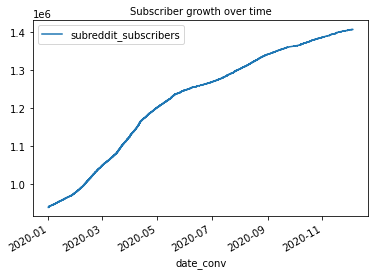

In [69]:
# Is it a popular subreddit?
fig = plt.figure(figsize=(15,10))
fig = data.plot.line(x='date_conv', y='subreddit_subscribers').get_figure()
plt.title('Subscriber growth over time', fontsize=10)
fig.savefig("Subscriber_growth_over_time.png")
plt.show()

#### Get Comments count over time

In [76]:
temp = data[data['id'] != 'g9ch8v'] # Comment count = 75K since post type was live chat

<Figure size 1080x720 with 0 Axes>

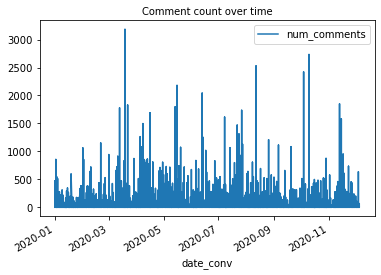

In [77]:
fig = plt.figure(figsize=(15,10))
fig = temp.plot.line(x='date_conv', y='num_comments').get_figure()
plt.title('Comment count over time', fontsize=10)
fig.savefig("Comment_count_over_time.png")
plt.show()

In [73]:
data[data['num_comments'] >10000].value_counts()

date             id      author    url                                                                                              score  upvote_ratio  num_comments  subreddit_subscribers  title                                text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             date_conv 
4/27/2020 18:58  g9ch8v  tizorres  https:

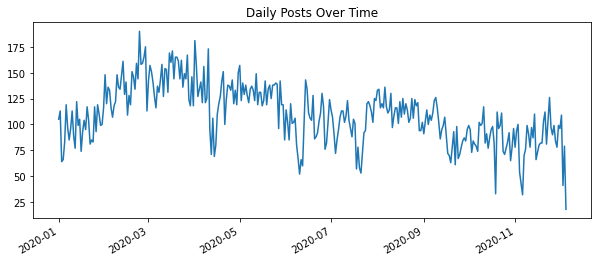

In [48]:
fig = plt.figure(figsize = (10,4))
plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
fig = data['date_conv'].value_counts().plot(kind='line', title='Daily Posts Over Time').get_figure()
fig.savefig("Daily_Posts_over_time.png")
plt.show()

# EXTRAS - START

### What is the Dominant topic and its percentage contribution in each document

In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

This way, one will know which document belongs predominantly to which topic.

In [25]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [26]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=processed_docs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.3773,"watch, movi, english, charact, time, show, sto...","[start, rewatch, disney, classic, kiddo, weird..."
1,1,1.0,0.3603,"go, brother, come, famili, sister, hous, live,...","[morn, phone, corner, hallway, chalk, mind, pl..."
2,2,23.0,0.4366,"time, feel, say, start, go, tell, think, know,...","[yesterday, buddi, problem, mutual, acquaint, ..."
3,3,21.0,0.2430,"go, feel, time, think, life, want, know, thing...","[learn, larg, group, children, attend, primari..."
4,4,23.0,0.9713,"time, feel, say, start, go, tell, think, know,...","[lone, hurt, sick, fight, depress, anorexia, s..."
5,5,32.0,0.3732,"class, year, student, work, school, start, tim...","[graduat, live, parent, sibl, haven, start, ea..."
6,6,21.0,0.4551,"go, feel, time, think, life, want, know, thing...","[okay, yesterday, couldn, school, thing, like,..."
7,7,14.0,0.5294,"peopl, dont, know, think, thing, feel, make, t...","[want, life, normal, scientist, believ, mask, ..."
8,8,32.0,0.4201,"class, year, student, work, school, start, tim...","[worri, say, experi, normal, rounder, pick, wa..."
9,9,8.0,0.6487,"watch, movi, english, charact, time, show, sto...","[finish, watch, frankenstein, think, pretti, o..."


### The most representative sentence for each topic

Sometimes we want to get samples of sentences that most represent a given topic. This code gets the most exemplar sentence for each topic.

In [27]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9840,"weight, feel, go, lose, want, eat, start, time, bodi, year","[lose, lose, lose, lose, lose, lose, lose, lose, lose, lose, lose, lose, lose, lose, lose, lose,..."
1,1.0,0.9697,"go, brother, come, famili, sister, hous, live, love, tell, leav","[year, tight, spot, live, room, uncl, hous, time, cousin, adopt, young, puppi, sadi, immedi, bon..."
2,2.0,0.9797,"text, hair, say, know, tell, look, want, girl, friend, messag","[weird, question, know, tire, hurt, hair, high, ponytail, medium, length, hair, past, shoulder, ..."
3,3.0,0.9944,"https, reddit, card, money, wiki, email, post, phone, want, time","[offer, term, read, materi, better, time, resourc, etiquett, https, reddit, wiki, etiquett, http..."
4,4.0,0.9750,"feel, know, thing, think, peopl, want, time, live, go, dont","[result, morn, mild, symptom, day, feel, live, friend, famili, test, miss, work, result, lose, s..."
5,5.0,0.9829,"love, life, song, look, want, world, think, color, beauti, know","[listen, music, like, pictur, singer, sing, song, opinion, make, listen, music, littl, recent, p..."
6,6.0,0.9587,"say, tell, know, think, sick, come, want, time, thing, work","[argument, woman, tell, punch, person, expect, regardless, gender, angri, ask, punch, punch, say..."
7,7.0,0.9878,"dream, sleep, wake, night, time, rememb, go, feel, asleep, hour","[dream, think, wake, wake, sleep, paralysi, dream, unabl, pump, signific, escap, dream, lay, edg..."
8,8.0,0.9793,"watch, movi, english, charact, time, show, stori, languag, know, think","[want, watch, movi, long, time, unfortun, wasn, avail, netflix, countri, today, access, netflix,..."
9,9.0,0.9905,"drink, food, water, open, door, time, eat, think, go, thing","[start, eat, cooki, bake, cooki, decid, leav, plate, kitchen, counter, like, slob, later, prepar..."


### Frequency Distribution of Word Counts in Documents

When working with a large number of documents, you want to know how big the documents are as a whole and by topic. Let’s plot the document word counts distribution.

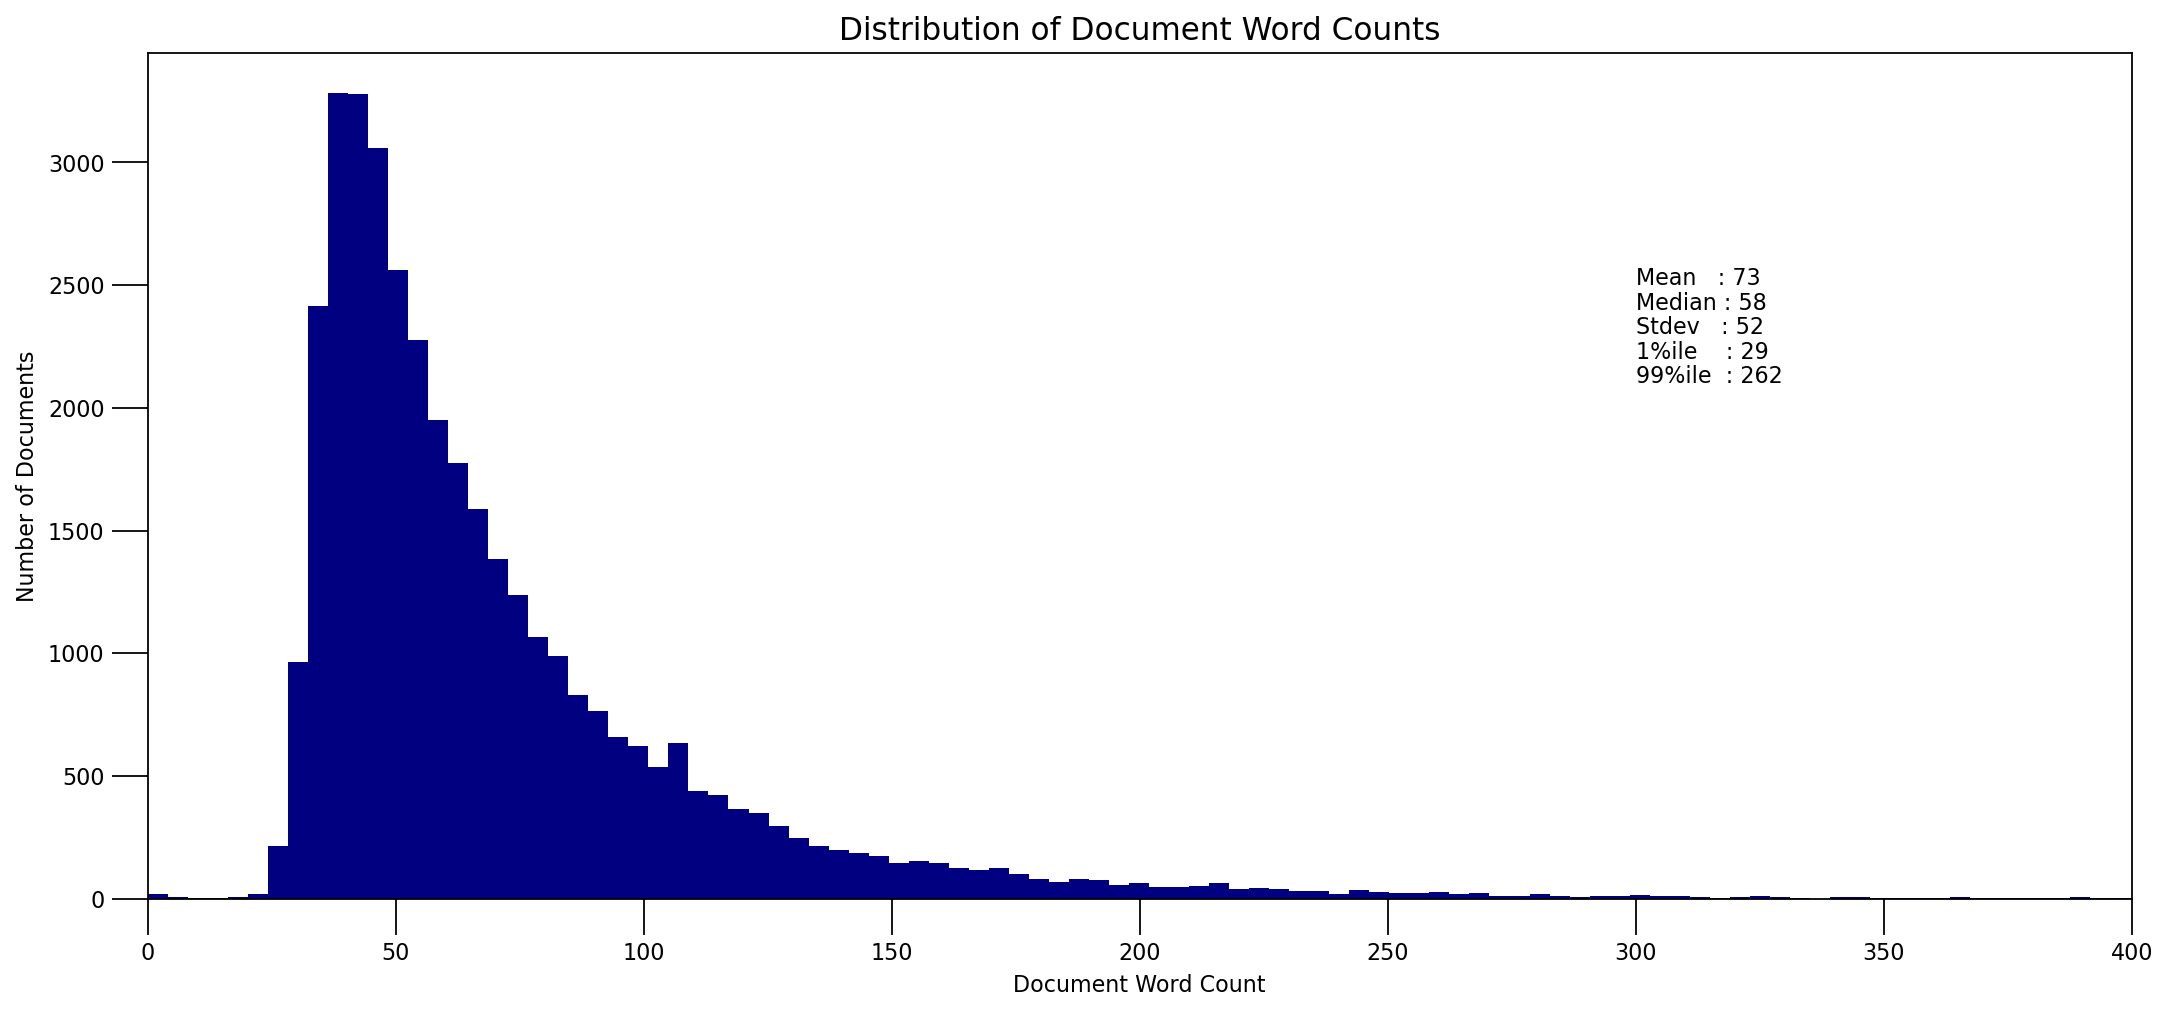

In [33]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 400, color='navy')
plt.text(300, 2500, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(300, 2400, "Median : " + str(round(np.median(doc_lens))))
plt.text(300, 2300, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(300, 2200, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(300, 2100, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 400), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,400,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=14))
plt.savefig('FreqDist of Word Counts in Documents.png')
plt.show()

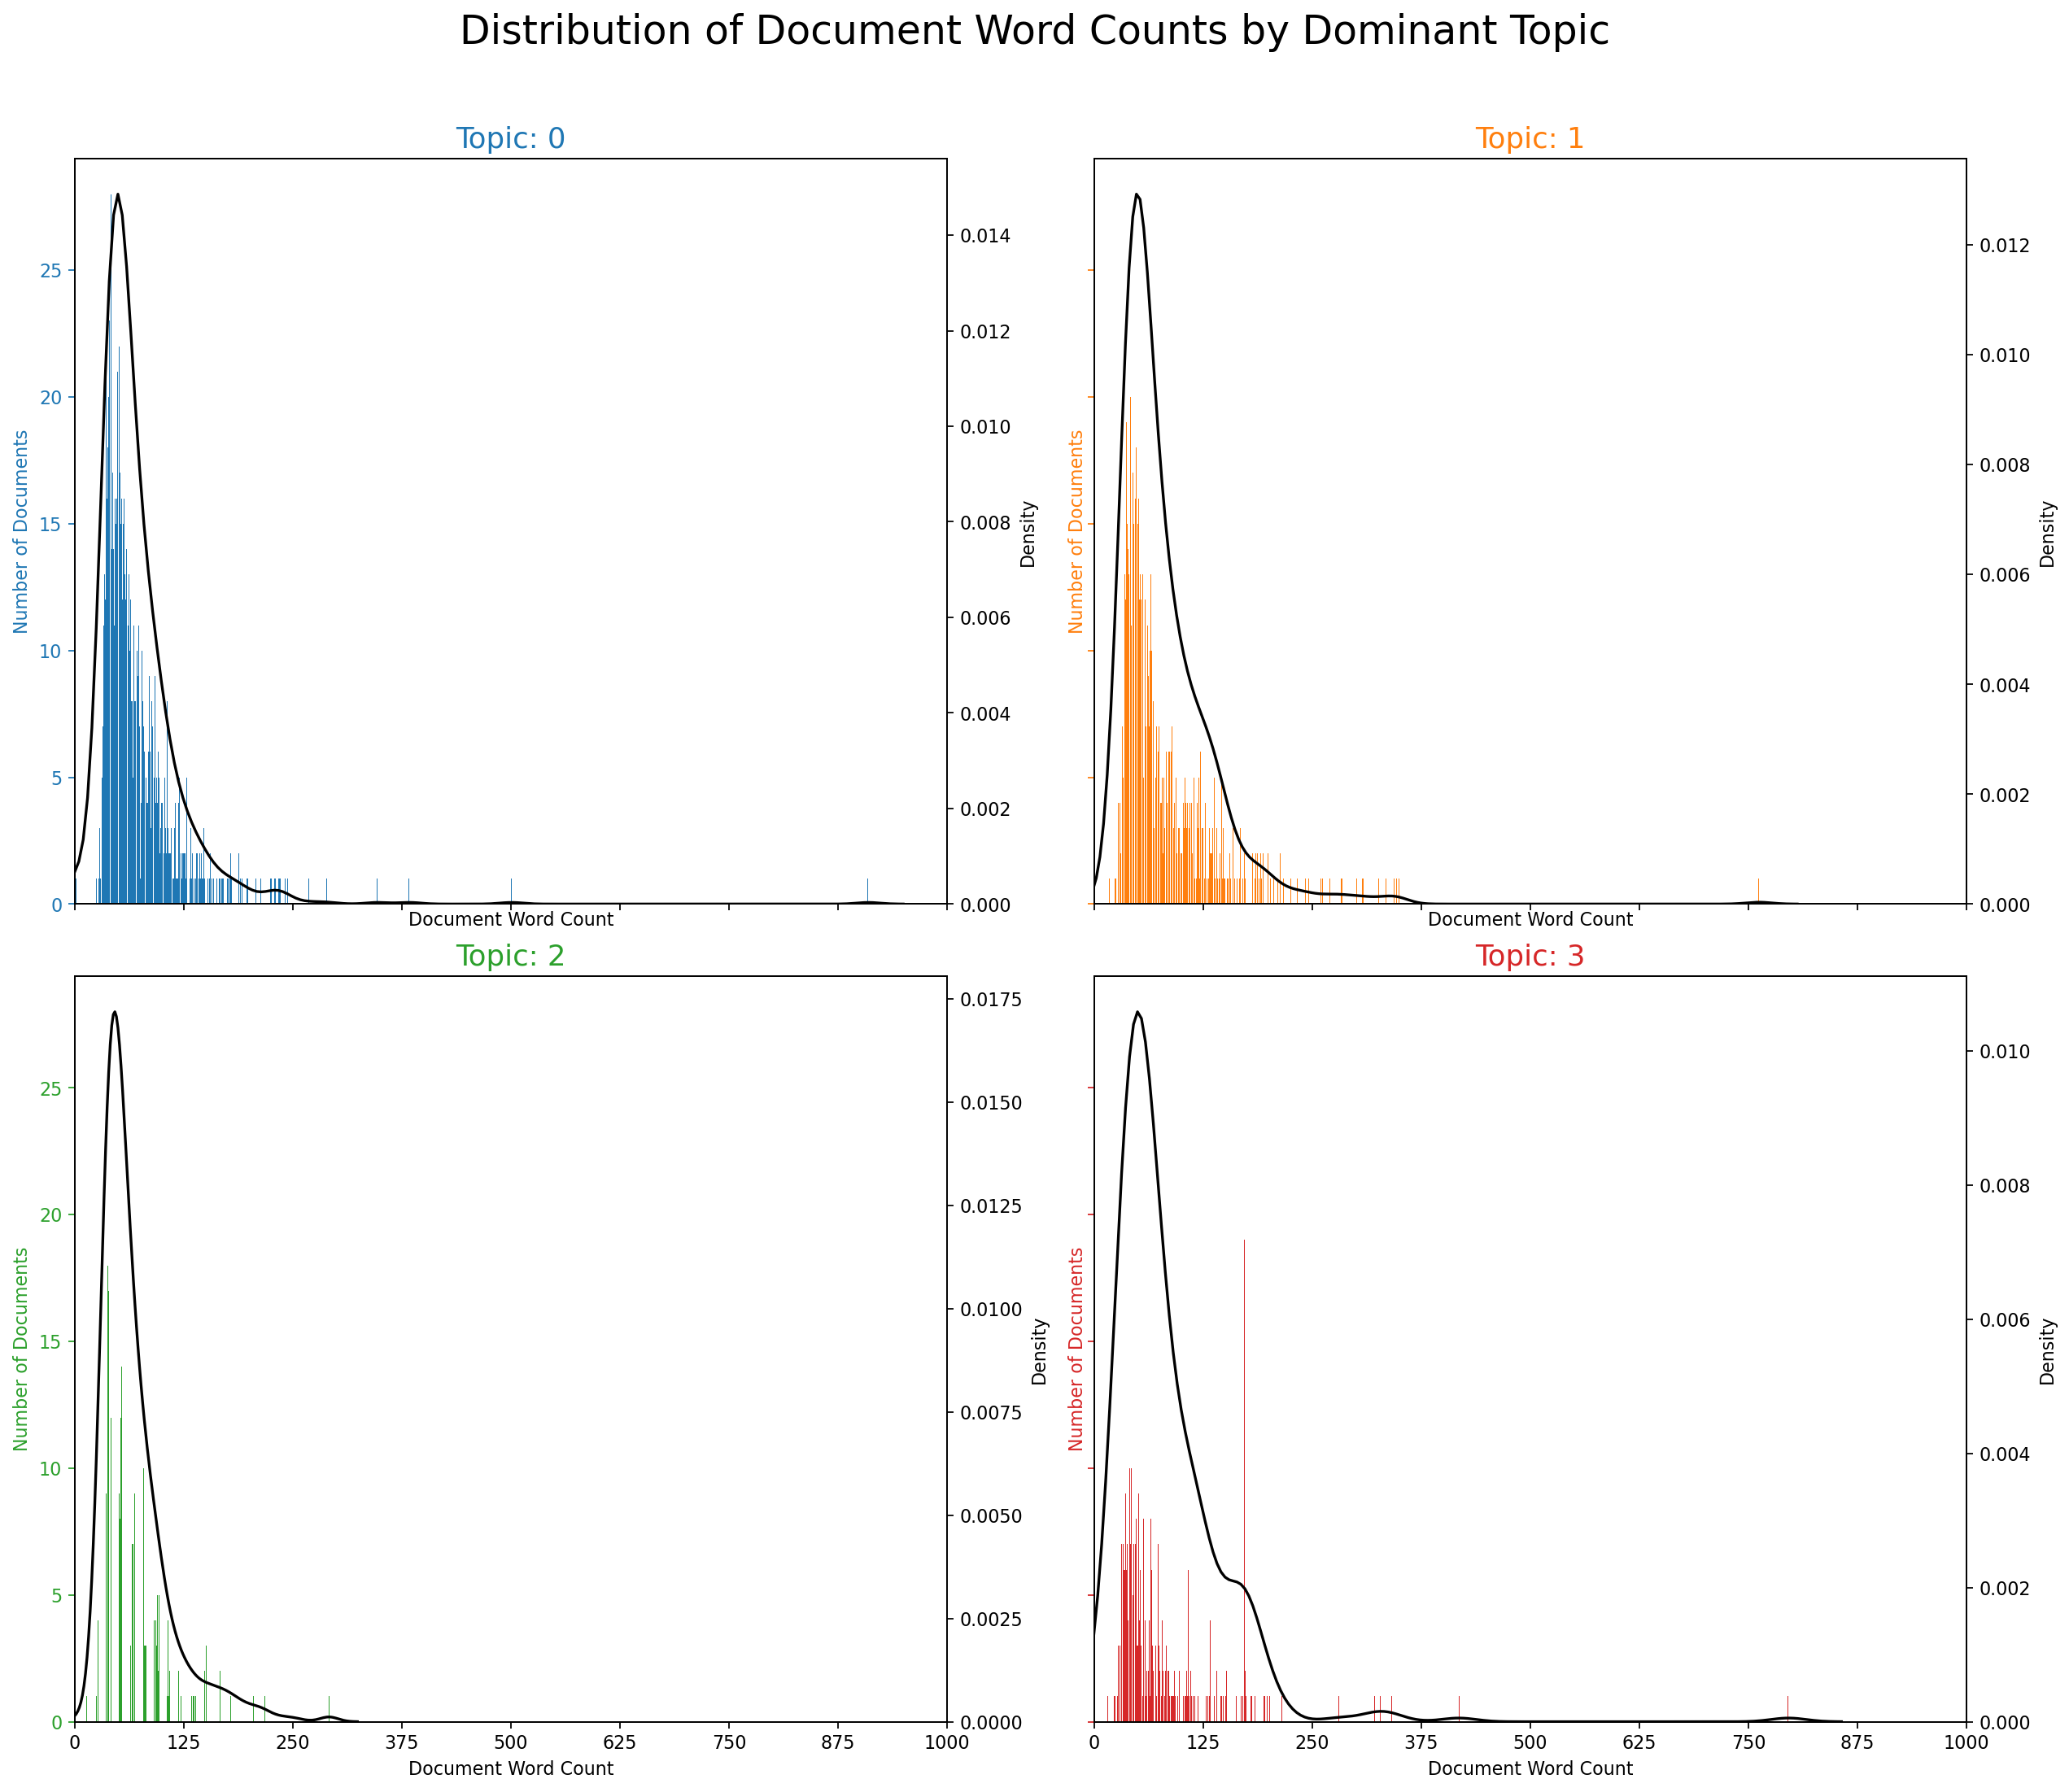

In [34]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
fig.savefig('FreqDist of Word Counts in Documents SNS.png')
plt.show()

### Word Clouds of Top N Keywords in Each Topic
Though we’ve already seen what are the topic keywords in each topic, a word cloud with the size of the words proportional to the weight is a pleasant sight. The coloring of the topics I’ve taken here is followed in the subsequent plots as well.

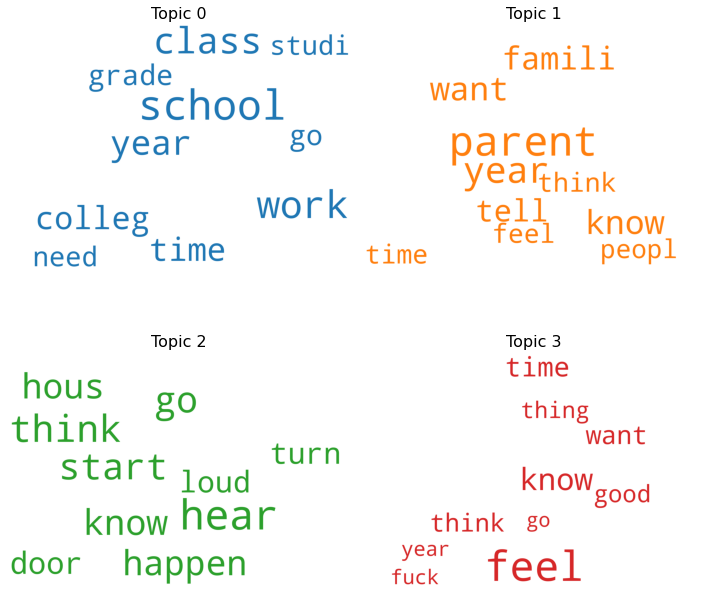

In [39]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### What are the most discussed topics in the documents?
Let’s compute the total number of documents attributed to each topic.

In [45]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp]
        wordid_topics = model[corp]
        wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=bow_corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

### Let’s make two plots:
1. The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
2. The number of documents for each topic by by summing up the actual weight contribution of each topic to respective documents.

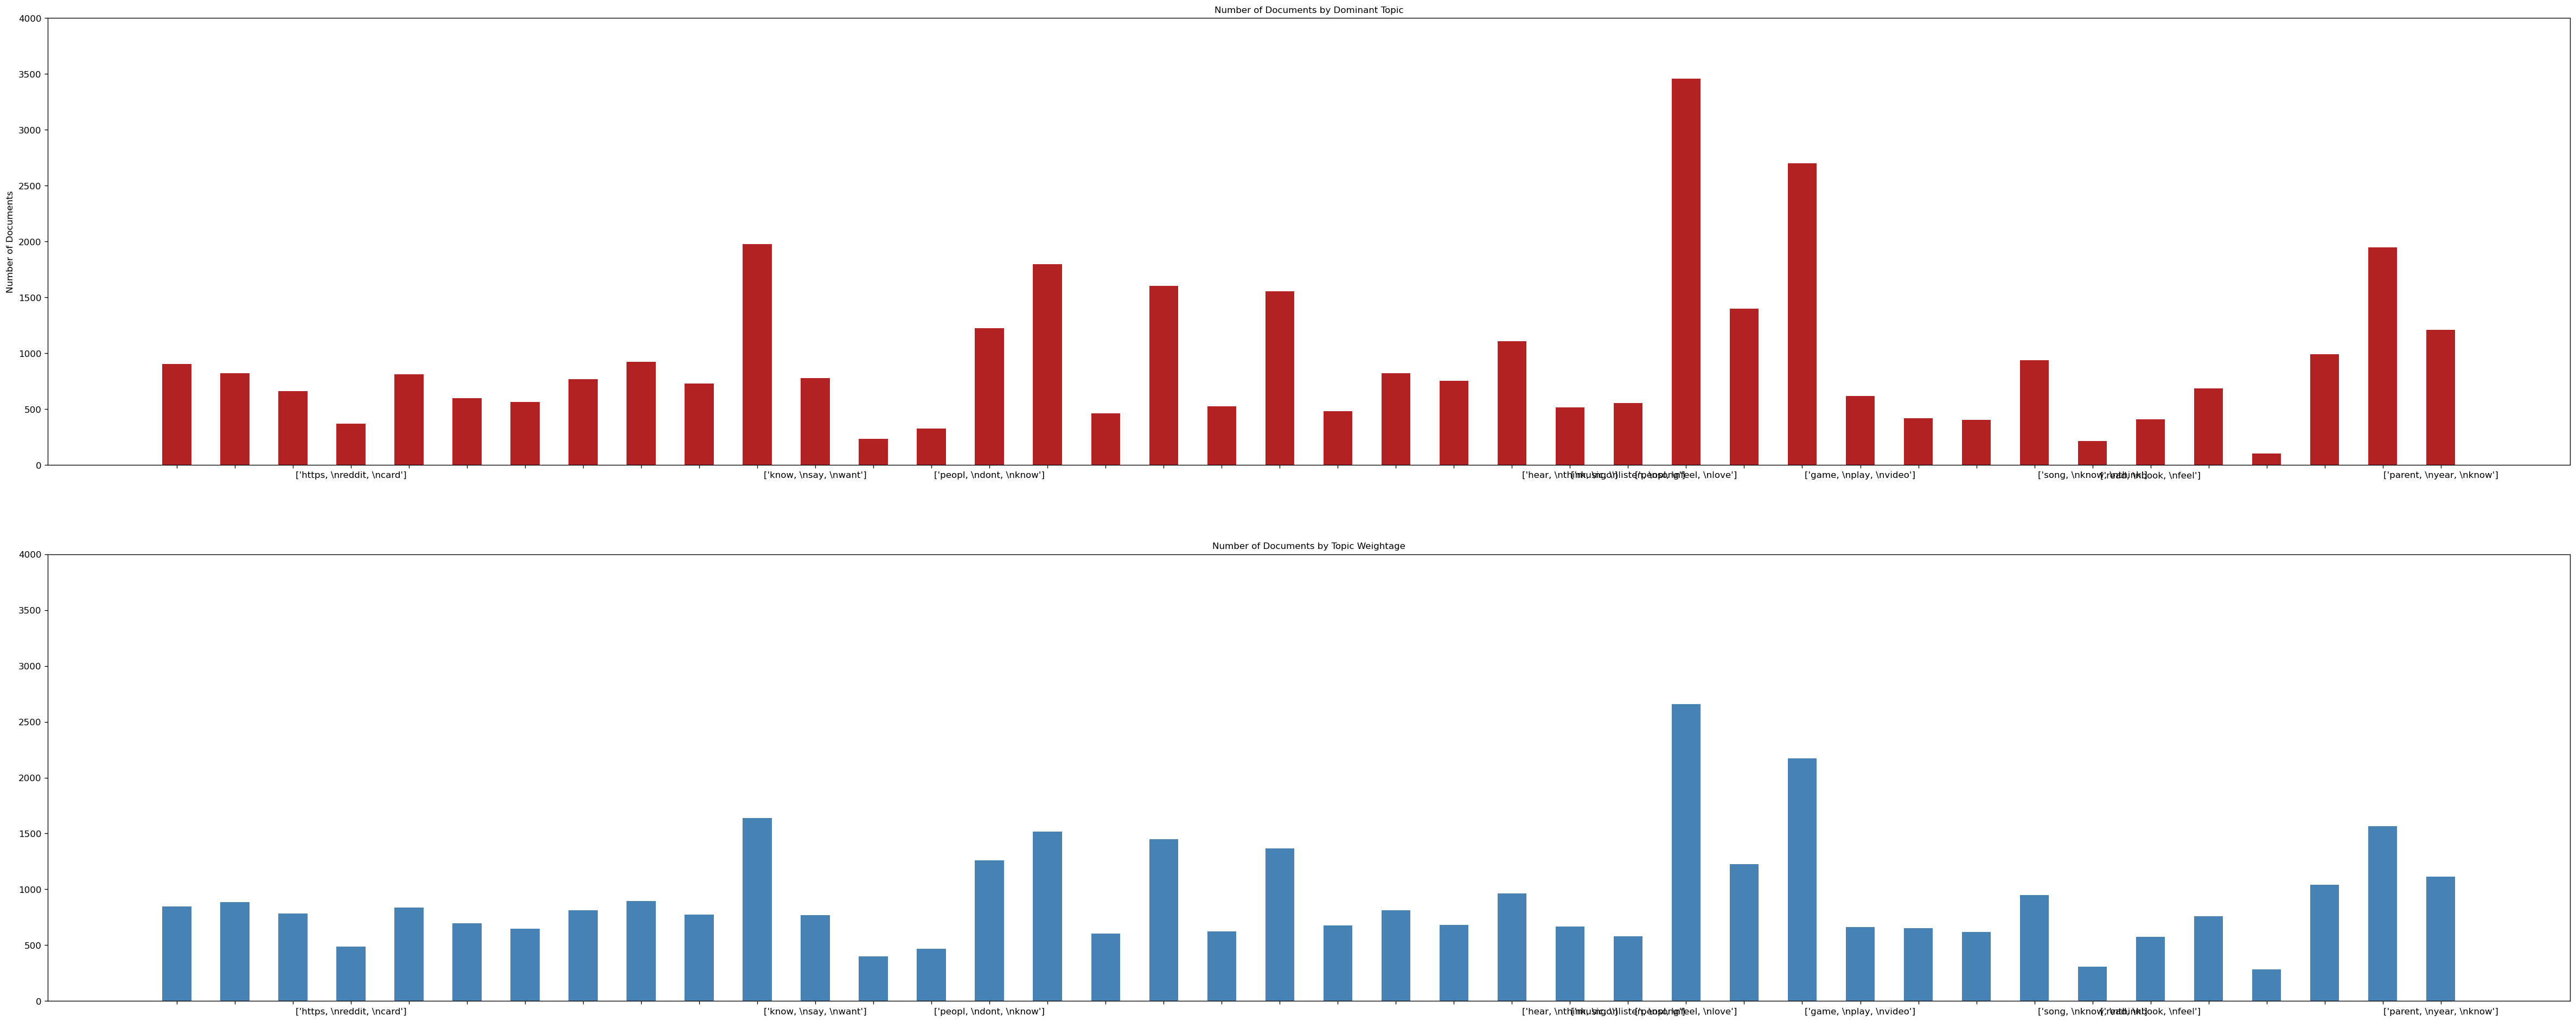

In [61]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(50, 20), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: df_top3words.loc[df_top3words.topic_id==x, 'words'].values)
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 4000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

# EXTRAS - END